# Tensor 的连接操作

## cat

>torch.cat(tensors, dim = 0, out = None)

In [5]:
import torch
A=torch.ones(3,3)
A

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [6]:
B=2*torch.ones(3,3)
B

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [7]:
C=torch.cat((A,B),0)
C

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [9]:
C=torch.cat((A,B),1)
C

tensor([[1., 1., 1., 2., 2., 2.],
        [1., 1., 1., 2., 2., 2.],
        [1., 1., 1., 2., 2., 2.]])

In [11]:
C.shape

torch.Size([3, 6])

## stack

   cat 实际上是将多个 Tensor 在**已有的维度**上进行连接
   增加新的维度进行连接,，又该怎么做呢？  **stack 函数登场**
   
 >torch.stack(inputs, dim=0)

# Tensor 的切分操作

     学完了连接操作之后，我们再来看看连接的逆操作：切分。
## chunk

>torch.chunk(input, chunks, dim=0)

* input，它表示要做 chunk 操作的 Tensor
* chunks，它代表将要被划分的块的数量，而不是每组的数量。chunks 必须是整型
* dim,按照哪个维度来进行 chunk

In [12]:

A=torch.tensor([1,2,3,4,5,6,7,8,9,10])
B = torch.chunk(A, 2, 0)
B


(tensor([1, 2, 3, 4, 5]), tensor([ 6,  7,  8,  9, 10]))

In [13]:
B = torch.chunk(A, 3, 0)
B

(tensor([1, 2, 3, 4]), tensor([5, 6, 7, 8]), tensor([ 9, 10]))

In [14]:
A=torch.tensor([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
B = torch.chunk(A, 4, 0)
B

# 17/4=4.25，向上取整就是 5，那就先逐个生成若干个长度为 5 的向量，最后不够的就放在一块，作为最后一个向量（长度 2）。

(tensor([1, 2, 3, 4, 5]),
 tensor([ 6,  7,  8,  9, 10]),
 tensor([11, 12, 13, 14, 15]),
 tensor([16, 17]))

In [15]:
A=torch.tensor([1,2,3])
B = torch.chunk(A, 5, 0)
B

(tensor([1]), tensor([2]), tensor([3]))

In [17]:
A=torch.ones(4,4)
B = torch.chunk(A, 2, 0)
B

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.]]))

* chunk 函数，是按照“切分成确定的份数”
* split 每份按照确定的大小”

## split

> torch.split(tensor, split_size_or_sections, dim=0)


* 首先是 tensor，也就是待切分的 Tensor。
* split_size_or_sections
    * 当它为整数时，表示将 tensor 按照每块大小为这个整数的数值来切割
    * 当这个参数为列表时，则表示将此 tensor 切成和列表中元素一样大小的块。
* dim，它定义了要按哪个维度切分。

In [20]:
A=torch.rand(4,4)
B=torch.split(A, 2, 0)
B
C=torch.split(A, 3, 0)
C

(tensor([[0.8401, 0.1698, 0.9949, 0.7924],
         [0.2132, 0.0946, 0.3613, 0.1608],
         [0.1464, 0.5548, 0.8358, 0.3316]]),
 tensor([[0.0088, 0.5994, 0.2511, 0.5715]]))

In [21]:
A=torch.rand(5,4)
A


tensor([[0.4422, 0.9923, 0.7082, 0.7286],
        [0.0760, 0.6070, 0.3571, 0.4343],
        [0.9259, 0.8483, 0.1071, 0.9695],
        [0.9799, 0.8318, 0.4148, 0.1562],
        [0.5366, 0.5523, 0.1596, 0.3343]])

In [22]:
B=torch.split(A,(2,3),0)
B


(tensor([[0.4422, 0.9923, 0.7082, 0.7286],
         [0.0760, 0.6070, 0.3571, 0.4343]]),
 tensor([[0.9259, 0.8483, 0.1071, 0.9695],
         [0.9799, 0.8318, 0.4148, 0.1562],
         [0.5366, 0.5523, 0.1596, 0.3343]]))

## unbind

>torch.unbind(input, dim=0)

**unbind 是一种降维切分的方式，相当于删除一个维度之后的结果。**

In [23]:
A=torch.arange(0,16).view(4,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [24]:
b=torch.unbind(A, 0)
b

(tensor([0, 1, 2, 3]),
 tensor([4, 5, 6, 7]),
 tensor([ 8,  9, 10, 11]),
 tensor([12, 13, 14, 15]))

# Tensor 的索引操作

        索引操作有很多方式，有提供好现成 API 的，也有用户自行定制的操作，其中最常用的两个操作就是 index_select 和 masked_select

## index_select

>torch.index_select(tensor, dim, index)

* index是 torch.Tensor 类型。

In [25]:
A=torch.arange(0,16).view(4,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [26]:
B=torch.index_select(A,0,torch.tensor([1,3]))
B

tensor([[ 4,  5,  6,  7],
        [12, 13, 14, 15]])

In [31]:
C=torch.index_select(A,1,torch.tensor([0,3]))
C

tensor([[ 0,  3],
        [ 4,  7],
        [ 8, 11],
        [12, 15]])

## masked_select

### 背景

        通过一些判断条件来进行选择，比如提取深度学习网络中某一层中数值大于 0 的参数。
        
>torch.masked_select(input, mask, out=None) 

In [49]:
A=torch.rand(5)
A


tensor([0.9834, 0.3783, 0.2474, 0.4224, 0.3776])

In [50]:
B=A>0.3
B

tensor([ True,  True, False,  True,  True])

In [51]:
C=torch.masked_select(A, B)
C

# C 实际上得到的就是：A 中“满足 B 里面元素值为 True 的”对应位置的数据

tensor([0.9834, 0.3783, 0.4224, 0.3776])

# 小结

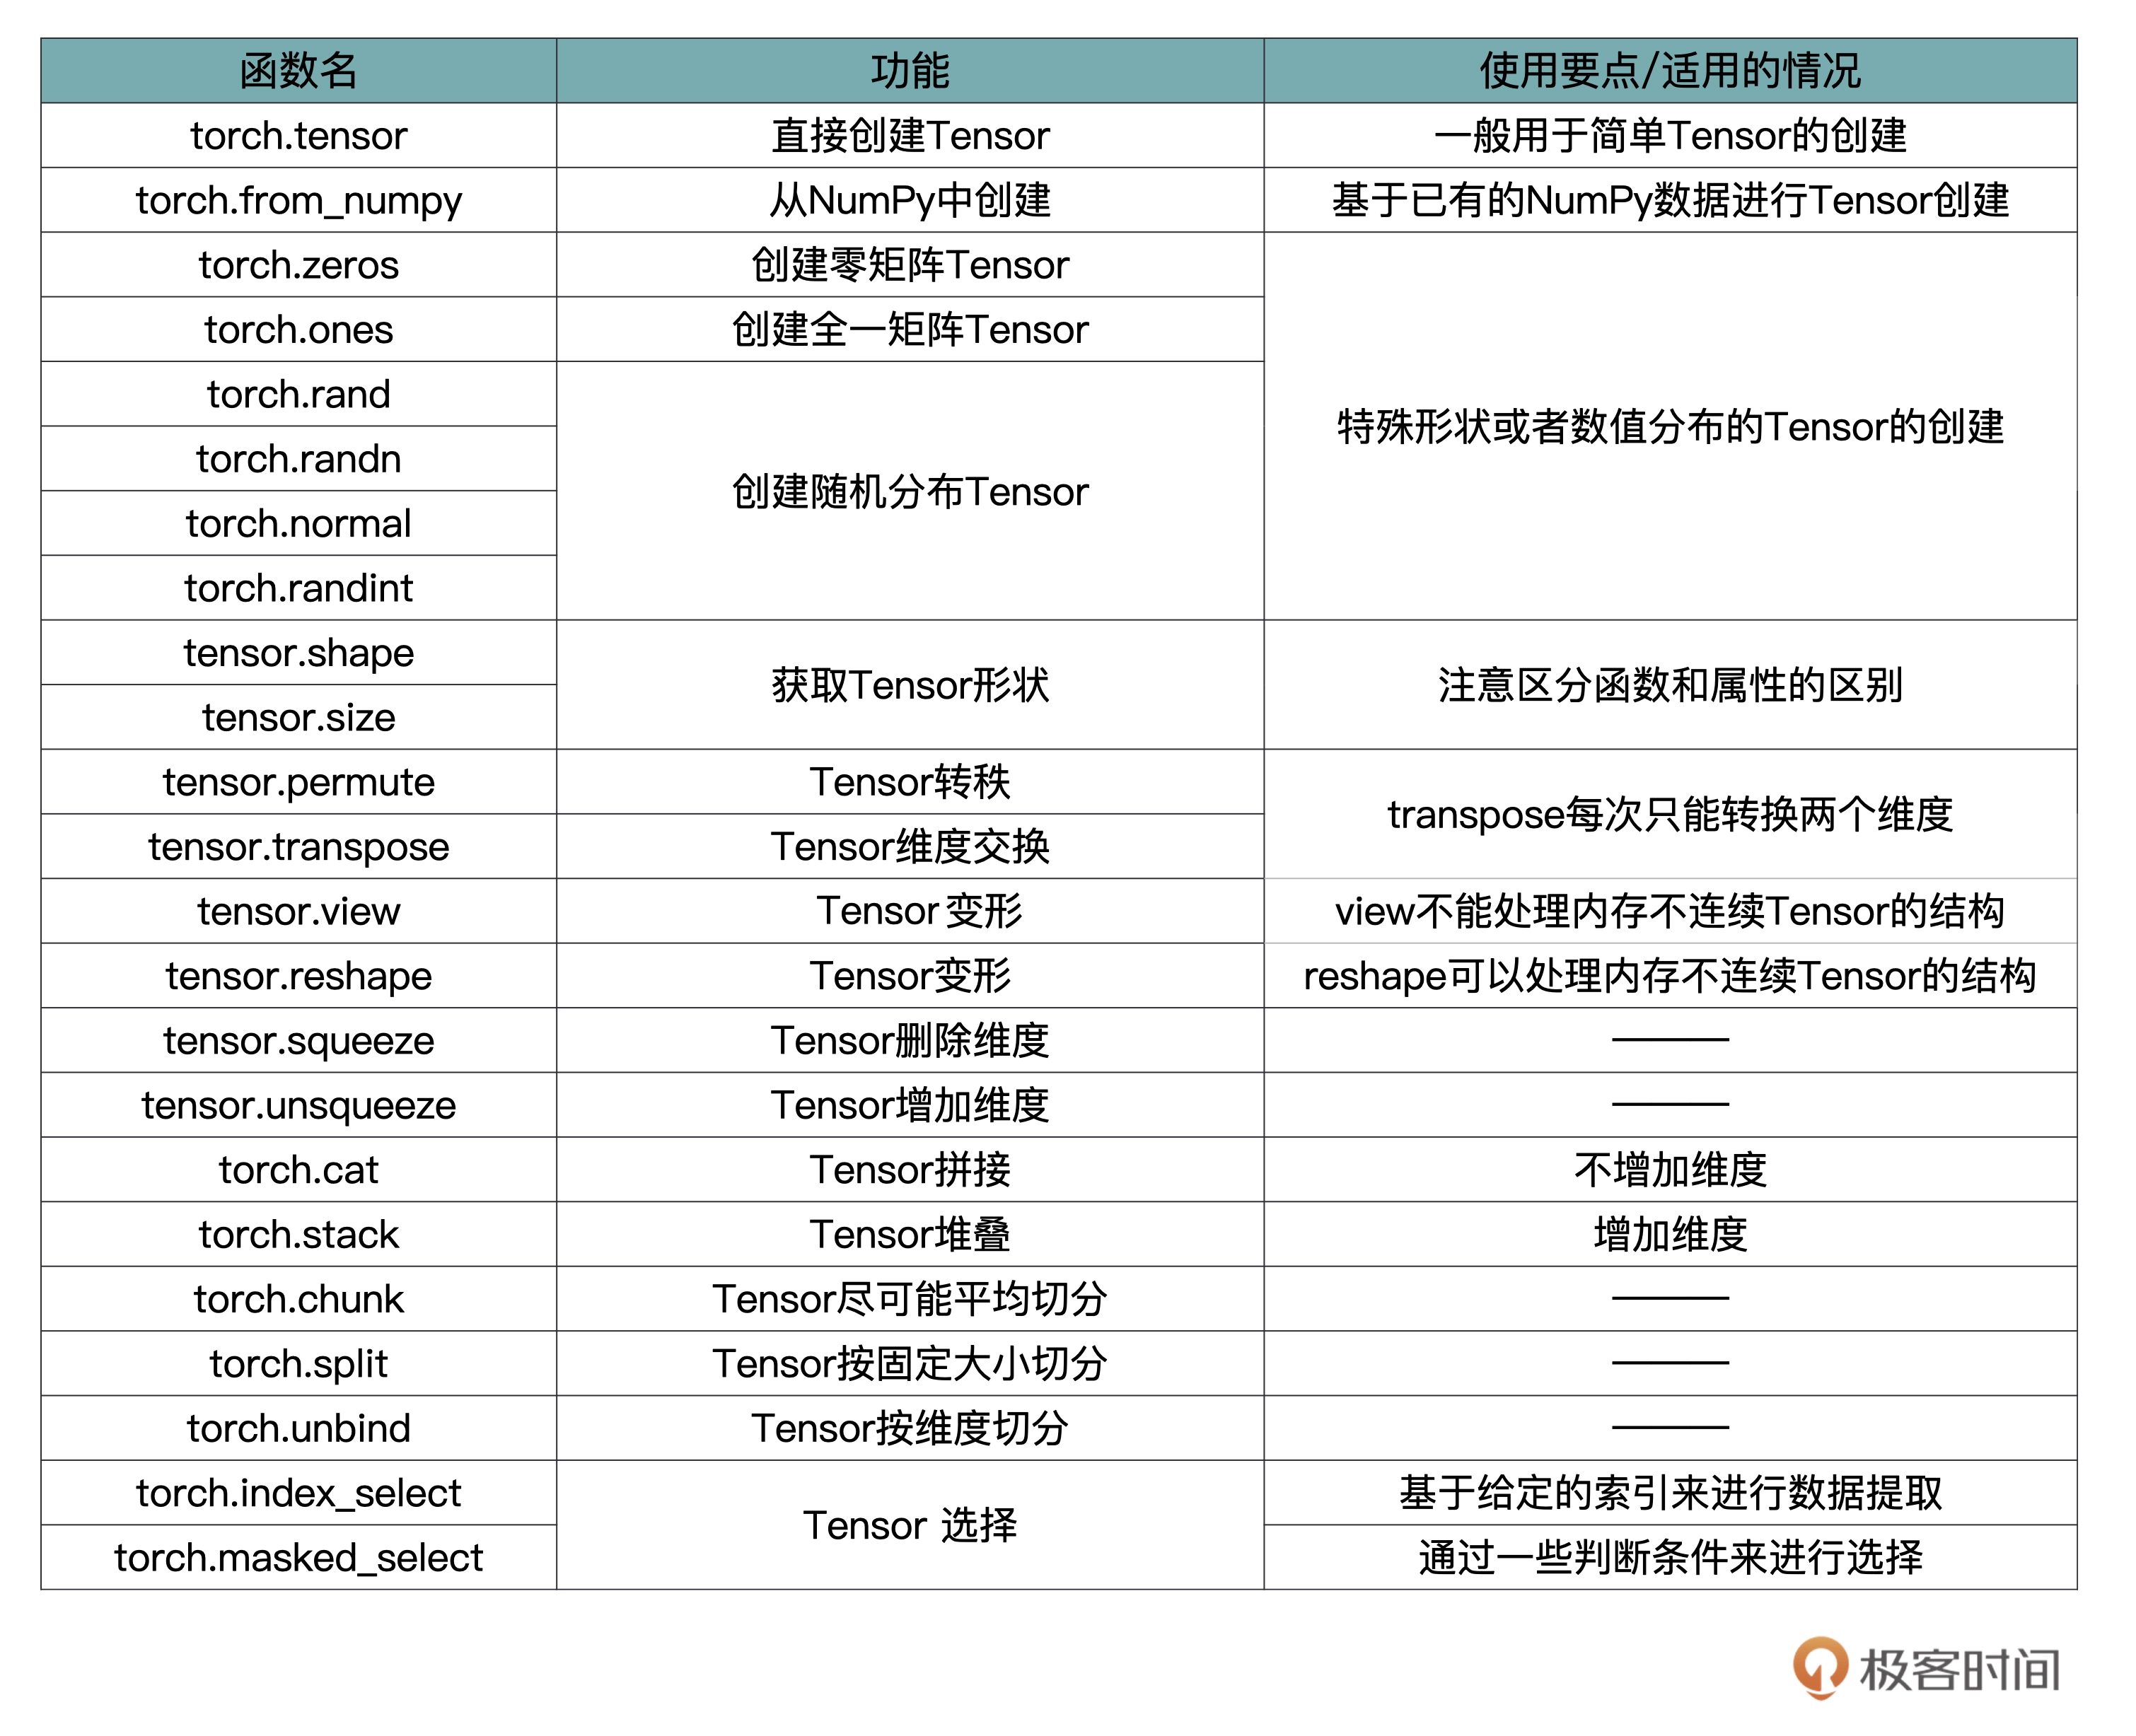

# 每课一练

'''
A=torch.tensor([[4,5,7], [3,9,8],[2,3,4]])
A
'''

想提取出其中第一行的第一个，第二行的第一、第二个，第三行的最后一个，该怎么做呢？

In [52]:
A=torch.tensor([[4,5,7], [3,9,8],[2,3,4]])
B=torch.eye((3))
C=torch.masked_select(A,B>0)
print(B>0)
C

tensor([[ True, False, False],
        [False,  True, False],
        [False, False,  True]])


tensor([4, 9, 4])

In [43]:
help(torch.eye)

Help on built-in function eye in module torch:

eye(...)
    eye(n, m=None, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a 2-D tensor with ones on the diagonal and zeros elsewhere.
    
    Args:
        n (int): the number of rows
        m (int, optional): the number of columns with default being :attr:`n`
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, uses the current device for the default tensor type
            (see :func:`torch.set_default_tensor_type

# todo


## Q1 如何把单位阵转换为 True/False
C=torch.masked_select(A,B>0)
